In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#loading the dataset
df=pd.read_csv("/content/atm bank dataset.csv")
df.head()


,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [ ]:
df.shape 

(2244, 11)



*   2244 rows and 11 columns




In [ ]:
#for knowing statastical values
df.describe()

,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06


In [ ]:
#check the datatype of each variable
df.dtypes

id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

In [ ]:
#checking null values
df.isnull().sum()

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

* There is no Null values.

In [ ]:
#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1) 

In [ ]:
df.head()

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [ ]:
df.columns

Index(['weekday', 'festival_religion', 'working_day', 'holiday_sequence',
       'trans_date_set', 'trans_month', 'trans_year', 'prevweek_mean',
       'total_amount_withdrawn'],
      dtype='object')

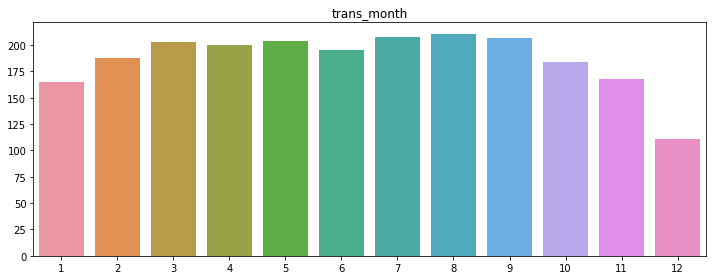

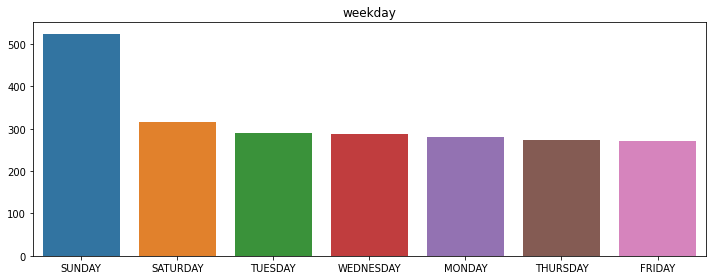

In [ ]:
categorcial_variables = ['trans_month','weekday']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index,df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

As we can see in the bar plot, Saturdays and Sundays are the most active days to withdraw money.


In [ ]:
#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])

In [ ]:
df.shape

(2244, 27)

After OHE we have 2244 observations with 27 columns (features).

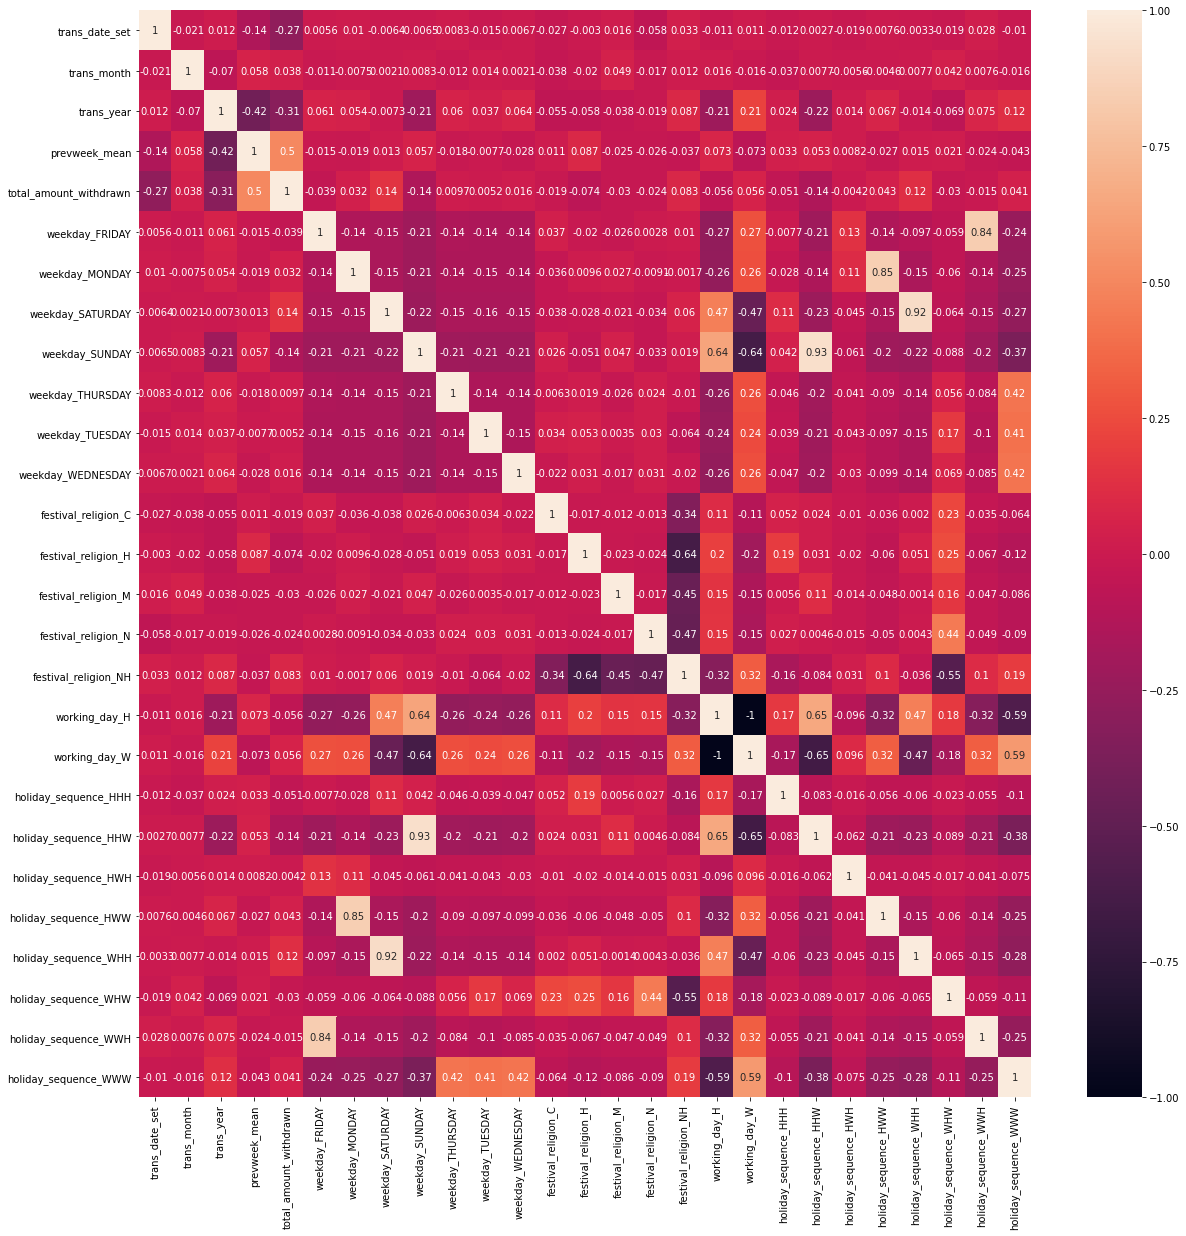

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


In [ ]:
x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


(1795, 24) (449, 24) (1795,) (449,)


#Linear Regression


In [ ]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred=model.predict(xtest)

In [ ]:
data1= pd.DataFrame({'Actual': ytest, 'Predicted': pred})
data1

,Actual,Predicted
483,454700,305799.020060
503,102700,436103.020060
1918,326500,200519.020060
1972,523000,215495.020060
231,409000,606447.192299
...,...,...
1553,635000,495008.888514
408,713700,561543.020060
112,251700,555823.192299
607,927800,577863.020060


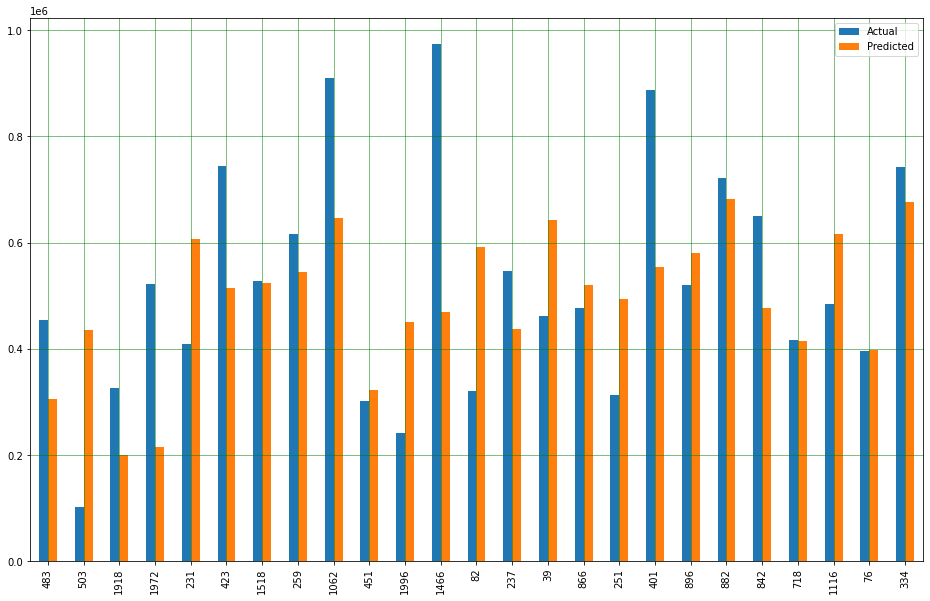

In [ ]:
#plotting graph of prediction vs actual value
df1 = data1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2=metrics.r2_score(ytest,pred)
print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2)

158703.3125967149
42654371022.966286
206529.34663859828
0.3594375403110259


#XGBoost Regression

In [ ]:
import xgboost as xgb

model_xgb=xgb.XGBRegressor()
model_xgb.fit(xtrain,ytrain)
pred=model_xgb.predict(xtest)

[18:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
data2= pd.DataFrame({'Actual': ytest, 'Predicted': pred})
data2

,Actual,Predicted
1545,717400,574618.4375
432,885400,801258.7500
1856,18600,135278.5625
63,644900,659951.4375
936,386200,554969.8125
...,...,...
778,492000,522718.5625
845,639600,700749.0000
2125,247000,256481.0625
47,441400,546879.6875


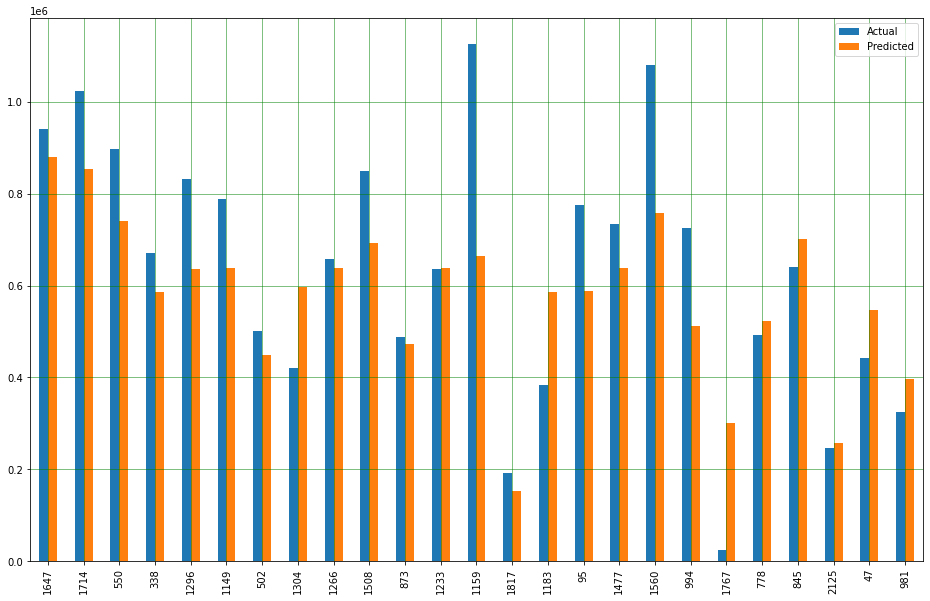

In [ ]:
#predic value vs actual
df1 = data2.tail(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
MAE_xb=metrics.mean_absolute_error(ytest,pred)
MSE_xb=metrics.mean_squared_error(ytest,pred)
RMSE_xb=np.sqrt(MSE)

print(MAE_xb)
print(MSE_xb)
print(RMSE_xb)                    


133828.1626618179
30546804543.299232
173780.12991574506


In [ ]:
pip install shap

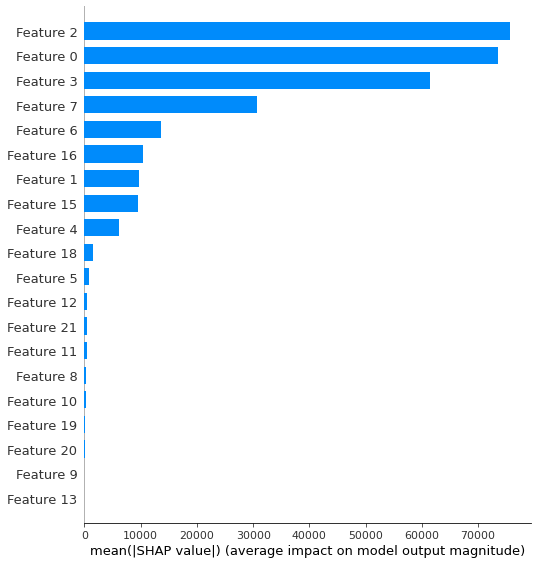

In [ ]:
#feature importance
import shap
shap_values = shap.TreeExplainer(model_xgb).shap_values(xtest)
shap.summary_plot(shap_values, xtest, plot_type="bar")

#  LGBMRegressor



In [ ]:
from lightgbm import LGBMRegressor

gbm=LGBMRegressor(objective='regression',num_leaves=31,random_state=42,learning_rate=.1,n_estimators=100)
gbm.fit(xtrain,ytrain,eval_set=[(xtest,ytest)],eval_metric='rmse',early_stopping_rounds=10,verbose=50)
print();
print(gbm)

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[38]	valid_0's rmse: 173674	valid_0's l2: 3.01627e+10

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


In [ ]:
lgbm_predict=gbm.predict(xtest,num_iteration=gbm.best_iteration_)
data3= pd.DataFrame({'Actual': ytest, 'Predicted': lgbm_predict})
data3

,Actual,Predicted
1545,717400,613913.497422
432,885400,793635.249543
1856,18600,118643.111933
63,644900,652592.301892
936,386200,560325.723204
...,...,...
778,492000,546251.818880
845,639600,734909.524737
2125,247000,291474.744746
47,441400,516770.613056


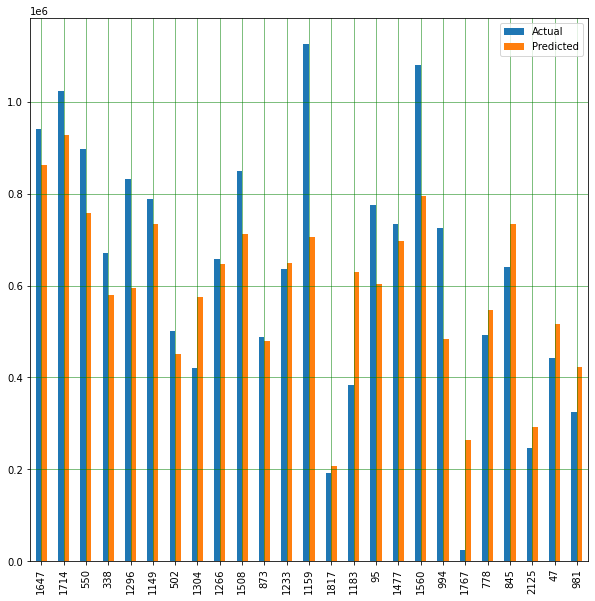

In [ ]:
df1 = data3.tail(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
MAE_gbm=metrics.mean_absolute_error(ytest,pred)
MSE_gbm=metrics.mean_squared_error(ytest,pred)
RMSE_gbm=np.sqrt(MSE)

print(MAE_gbm)
print(MSE_gbm)
print(RMSE_gbm)                    


133828.1626618179
30546804543.299232
173780.12991574506


# ANN

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(25, activation = 'relu', input_dim = 22))
# Adding the 2 hidden layer
classifier.add(Dense(20, activation = 'relu'))
# Adding the 3 hidden layer
classifier.add(Dense(15, activation = 'relu'))
# Adding the 4 hidden layer
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'linear'))
# Adding the output layer
#classifier.add(Dense(1, activation = 'linear'))
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'mse')
# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size=100,epochs = 500)
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(xtest)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 325580095488.0000
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 325579669504.0000
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 325578686464.0000
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 325576982528.0000
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 325573476352.0000
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 325566136320.0000
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 325550473216.0000
Epoch 8/500
18/18 [==============================] - 0s 1ms/step - loss: 325519966208.0000
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 325465440256.0000
Epoch 10/500
18/18 [==============================] - 0s 1ms/step - loss: 325370609664.0000
Epoch 11/500
18/18 [==============================] - 0s 1ms/step - loss: 325217583104.00

In [ ]:
from sklearn import metrics

MAE_NN=metrics.mean_absolute_error(ytest, y_pred)
MSE_NN=metrics.mean_squared_error(ytest, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print(MAE_NN)
print(MSE_NN)
print(RMSE_NN)

158208.81399638084
41338931797.41187
203319.77719201808


# comparitive analysis

In [ ]:
ind=['Linear regression','XGBoost Regression','LGBMRegressor','ANN']
data={"MAE":[MAE_lr,MAE_xb,MAE_gbm,MAE_NN],"MSE":[MSE_lr,MSE_xb,MSE_gbm,MSE_NN],
      "RMSE":[RMSE_lr,RMSE_xb,RMSE_gbm,RMSE_NN]}
result=pd.DataFrame(data=data,index=ind)
result

,MAE,MSE,RMSE
Linear regression,157140.194146,4.161765e+10,173780.129916
XGBoost Regression,133828.162662,3.054680e+10,173780.129916
LGBMRegressor,133828.162662,3.054680e+10,173780.129916
ANN,158208.813996,4.133893e+10,203319.777192
